# Ising Model in 1D

For the Ising model on a 1D lattice we were able to find the partition function and thus the free energy per spin:

$f(T,H) = -k_BT \left [ \beta J + \ln(\cosh(\beta H)) + \sqrt{\sinh^2(\beta H) + \exp(-4 \beta J)} \right ]$

First and second derivation of the free energy per spin by the magnetic field $H$ gives us the magnetization per spin $m(T,H)$ 
and the susceptibility $\chi(T,H)$:

$m(T,H)  = \frac{\sinh (\beta H)}{\sqrt{\sinh^2(\beta H) + \exp(-4 \beta J)}}$

and 

$\chi(T,H) = \beta \frac{\cosh(\beta H) \exp(-4 \beta J)}{(\sinh^2(\beta H) + \exp(-4 \beta J))^{3/2}}$

An implementation of the free energy function is given together with 3D plots of $f(T,H)$ and 2D projections for different temperatures $T$ (which might actually give you better insight than the 3D plots - or you are better with playig with the parameter for the 3D plot than I am ...).


To do list (this will be part of your assignment):

- Interpret the $f(T,H)$ plots. What happens for small $T$? What happens if you vary the coupling strength $J$? 
- Which case do you recover for $J=0$? Plot $f(T,H)$ for this case and explain the observed difference.
- Implement the magnetization $m(T,H)$ and susceptibility $\chi(T,H)$.
- Study and interpret $m(T,H)$ and $\chi(T,H)$ for $T\rightarrow 0$. 
- Show that the susceptibility per spin is related to the variance of the total magnetization via
$k_B T \chi(T,0) = \frac{1}{N} \left(\langle M^2\rangle - \langle M\rangle^2\right)$.
- Simplify the above formula for $\chi(T,H)$ for $H=0$.
- Use this to plot $k_B T \chi(T,0)$ against $\frac{k_B T}{J}$ and interpret the two limiting cases of 
$\frac{k_B T}{J}\rightarrow 0$ and $\frac{k_B T}{J}\rightarrow \infty$.
- Derive the formula for the spin-spin correlation function $g(r_i,r_j) = \tanh^r (\beta J)$ for $H=0$ where $r$ is the distance between the positions of the two spins $r_{i/j}$.
- Use the formula to define a correlation length $\xi(T, H=0)$. 
- Program this correlation length $\xi(T, H=0)$, make a plot and interpret the behaviour found.



<function matplotlib.pyplot.show(close=None, block=None)>

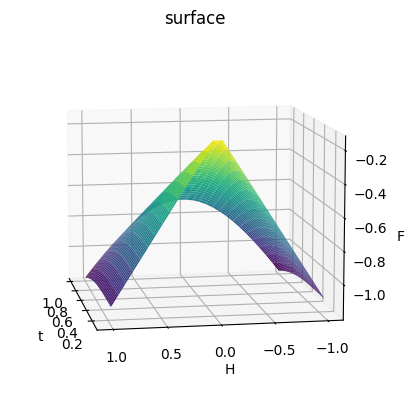

In [1]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt
import random as ran

# note: we set t = k_B T
#interaction strength
J = 0.1

def free_energy_1D(t,H,J):
    return -t*(J/t + np.log(np.cosh(H/t) + np.sqrt(np.sinh(H/t)**2 + np.exp(-4.*J/t))))

t = np.linspace(0.1, 1, 30)
h = np.linspace(-1, 1, 30)

T, H = np.meshgrid(t, h)
F = free_energy_1D(T, H, J)

#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.contour3D(T, H, F, 50, cmap='binary')
#ax.set_xlabel('t')
#ax.set_ylabel('H')
#ax.set_zlabel('F')


fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.plot_wireframe(T, H, F, color='black')
#ax.set_title('wireframe')
ax.view_init(10, 170)
ax.set_xlabel('t')
ax.set_ylabel('H')
ax.set_zlabel('F')




ax.plot_surface(T, H, F, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');
#ax.view_init(10, 140)

plt.show


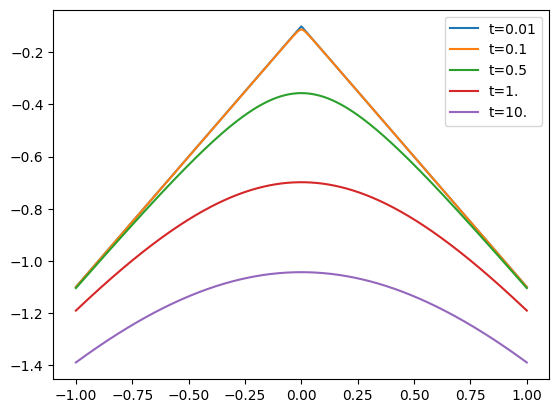

In [2]:
#2D projection
t = np.linspace(0.01, 1, 100)
h = np.linspace(-1, 1, 1000)

plt.plot(h,free_energy_1D(0.01, h, 0.1),label="t=0.01")
plt.plot(h,free_energy_1D(0.1, h, 0.1),label="t=0.1")
plt.plot(h,free_energy_1D(0.5, h, 0.1),label="t=0.5")
plt.plot(h,free_energy_1D(1., h, 0.1),label="t=1.")
plt.plot(h,free_energy_1D(1.5, h, 0.1),label="t=10.")
plt.legend()